<a href="https://colab.research.google.com/github/gabrielasarria/Lina-Flor/blob/main/semana2/Lina_Flor_Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Cargar dataset de ocupacion de sitios de parqueo
data_parq = pd.read_csv('/content/SJ.csv', header = 0)

In [65]:
# Revisar cabecera y cola del dataset
data_parq.head()

,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [66]:
data_parq.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [67]:
# Formatear la columna de fecha como año y mes
data_parq['date']= pd.to_datetime(data_parq['date'], format = '%Y-%m')

In [68]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
data_parq.head(7)

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665
5,2023-01-01,1,116672
6,2023-02-01,1,118194


In [69]:
# Contar el numero de datos del dataset
data_parq.count()

,0
date,18
idCompany,18
numTrx,18


In [70]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
data_parq.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [71]:
# Revisar si el ldataset tiene datos nullos
data_parq.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [72]:
# Establecer el campo fecha como index del dataframe
data_parq.set_index('date', inplace = True)

In [73]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
data_parq.head(7)

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665
2023-01-01,1,116672
2023-02-01,1,118194


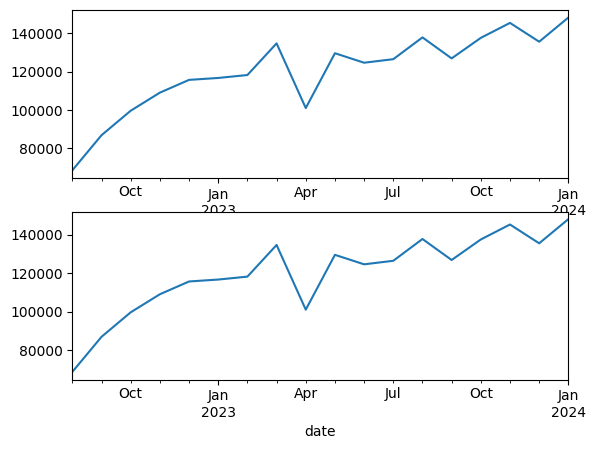

In [74]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
plt.subplot(2,1,1)
data_parq.numTrx.plot(style='-')
plt.subplot(2,1,2)
data_parq['2022-08-01': '2024-12-01'].numTrx.plot(style='-')
plt.show()


In [75]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
data_parq = data_parq.drop(labels = ['idCompany'],axis=1)

In [76]:
data_parq.head(7)

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665
2023-01-01,116672
2023-02-01,118194


In [77]:
# Escalar entre -1 y 1 los datos de la variable a predecir
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
data_parq_arr = scaler.fit_transform(data_parq)
data_parq_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [78]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento

steps = 10
x_train = []
y_train = []

for i in range(len(data_parq_arr)- steps ):
  x_train.append(data_parq_arr[i:i+ steps]) #0 - 10
  y_train.append(data_parq_arr[i+steps]) #2


In [79]:
# Convertir las listas en arrays de numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

In [80]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print (x_train.shape, y_train.shape)

(8, 10, 1) (8, 1)


In [82]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units = 256, return_sequences = True, activation='relu', input_shape = (10,1)))
model.add(Dropout(0.07))
model.add(LSTM(units = 256, return_sequences = True, activation='relu'))
model.add(Dropout(0.07))
model.add(LSTM(units = 128, return_sequences = True, activation='relu' ))
model.add(Dropout(0.07))
model.add(LSTM(units = 64, return_sequences = True, activation='relu' ))
model.add(Dropout(0.07))
model.add(LSTM(units = 32, return_sequences = True, activation='relu' ))
model.add(Dropout(0.07))
model.add(LSTM(units = 16, return_sequences = False, activation='relu' ))
model.add(Dropout(0.07))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 10, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_38 (LSTM)                       │ (None, 10, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 10, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_40 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_41 (LSTM)                       │ (None, 10, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_42 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,054,785 (4.02 MB)

 Trainable params: 1,054,785 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(optimizer='adam', loss='mse')

In [84]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16

history = model.fit (x_train, y_train, epochs=100, validation_split= 0.1 , batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 72s 72s/step - loss: 0.4299 - val_loss: 0.9662
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4088 - val_loss: 0.9307
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.3867 - val_loss: 0.8929
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.3646 - val_loss: 0.8522
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.3403 - val_loss: 0.8085
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.3125 - val_loss: 0.7609
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.2872 - val_loss: 0.7083
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.2554 - val_loss: 0.6495
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.2257 - val_loss: 0.5828
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.1945 - val_loss: 0.5050
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.1554 - val_loss: 0.4124
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.1230 

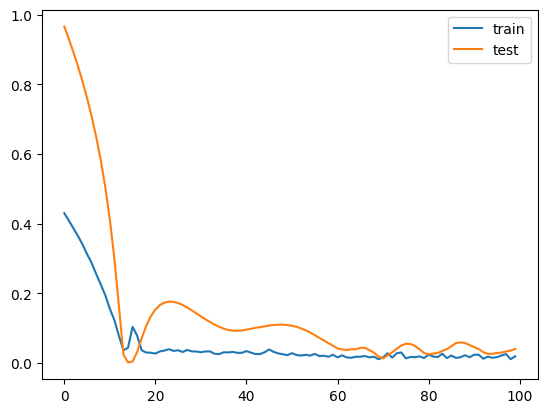

In [85]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [86]:
# Guardar el modelo y salvarlo en disco
model.save('my_model.h5')

In [87]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
N = 10
mes_prediccion = '2024-02-01'
data_ultimos_N = data_parq[-N:]
data_ultimos_N_arr = scaler.transform(data_ultimos_N)
xtest = np.array([data_ultimos_N_arr])
y_pred = model.predict(xtest)
y_pred_original = scaler.inverse_transform(y_pred)

print(f"Predicción de ocupación para {mes_prediccion}: {y_pred_original[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
Predicción de ocupación para 2024-02-01: 138030.8125


In [52]:
# prompt:  Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# # serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# # realiza la predicción, o el número de dias festivos del mes de predicción

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, concatenate


input_ts = Input(shape=(10, 1), name='input_ts')

lstm1 = LSTM(units=256, return_sequences=True, activation='relu')(input_ts)
lstm1 = Dropout(0.07)(lstm1)
lstm2 = LSTM(units=128, return_sequences=True, activation='relu')(lstm1)
lstm2 = Dropout(0.07)(lstm2)
lstm3 = LSTM(units=64, return_sequences=False, activation='relu')(lstm2)
lstm3 = Dropout(0.07)(lstm3)


input_add = Input(shape=(2,), name='input_add')
merged = concatenate([lstm3, input_add])
dense1 = Dense(64, activation='relu')(merged)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1)(dense2)

model = Model(inputs=[input_ts, input_add], outputs=output)
model.summary()



Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ts (InputLayer)     │ (None, 10, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_28 (LSTM)            │ (None, 10, 256)        │        264,192 │ input_ts[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 10, 256)        │              0 │ lstm_28[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_29 (LSTM)            │ (None, 10, 128)        │        197,120 │ dropout_27[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 10, 128)        │              0 │ lstm_29[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_30 (LSTM)            │ (None, 64)             │         49,408 │ dropout_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_29 (Dropout)      │ (None, 64)             │              0 │ lstm_30[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_add (InputLayer)    │ (None, 2)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 66)             │              0 │ dropout_29[0][0],      │
│                           │                        │                │ input_add[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 64)             │          4,288 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 32)             │          2,080 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             33 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 517,121 (1.97 MB)

 Trainable params: 517,121 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='adam', loss='mse')